In [1]:
import pandas as pd
import string
import os
import math

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.python.framework import ops

In [2]:
cols = list(pd.read_csv("creditcard.csv", nrows =1))
print(cols)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [3]:
raw_data = pd.read_csv("creditcard.csv")

In [4]:
raw_data.shape

(284806, 31)

In [5]:
m = raw_data.shape[0]

In [6]:
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
raw_data.loc[raw_data["Class"] != 0].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [8]:
np.zeros([2, 3])

array([[0., 0., 0.],
       [0., 0., 0.]])

In [9]:
XY = np.zeros([m, 25])
for i in range(24):
    XY[:, i] = raw_data["V"+str(i+1)]
    
XY[:, -1] = raw_data["Class"]

In [10]:
clear_indices = np.where(XY[:,-1] == 0)[0]
flag_indices = np.where(XY[:,-1] == 1)[0]

XY_clear = XY[clear_indices,:]
XY_flag = XY[flag_indices,:]

In [11]:
np.random.seed(0)
np.random.shuffle(XY_clear)
np.random.shuffle(XY_flag)

In [12]:
XY_train = np.concatenate((XY_clear[:XY_clear.shape[0]*8//10, :], XY_flag[:XY_flag.shape[0]*8//10, :]))
XY_test = np.concatenate((XY_clear[XY_clear.shape[0]*8//10:, :], XY_flag[XY_flag.shape[0]*8//10:, :]))

In [13]:
X_train = XY_train[:, :-1].T
Y_train = XY_train[:, -1].reshape((1, XY_train.shape[0]))
X_test = XY_test[:, :-1].T
Y_test = XY_test[:, -1].reshape((1, XY_test.shape[0]))
Y_test.shape

(1, 56962)

In [14]:
Y_test[Y_test == 1].shape

(99,)

Helper functions for the neural network

In [15]:
def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

    ### START CODE HERE ### (approx. 2 lines)
    X = tf.placeholder(tf.float32, shape=(n_x, None), name="X")
    Y = tf.placeholder(tf.float32, shape=(n_y, None), name="Y")
    ### END CODE HERE ###
    
    return X, Y

In [16]:
def initialize_parameters(layer_dims):
    """
    Initializes parameters to build a neural network with tensorflow.
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, ... WL, bL
    """
    
    tf.set_random_seed(1)
    L = len(layer_dims)
    parameters = {}
    
    for l in range(1, L):
        parameters['W' + str(l)] = tf.get_variable('W' + str(l), [layer_dims[l],layer_dims[l-1]], \
                                                   initializer = tf.contrib.layers.xavier_initializer(seed = 1))
        parameters['b' + str(l)] = tf.get_variable('b' + str(l), [layer_dims[l],1], \
                                                   initializer = tf.zeros_initializer())
    
    return parameters

In [17]:
def forward_propagation(X, parameters, layer_dims):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> ... -> LOGREG
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL"
                  the shapes are given in initialize_parameters

    Returns:
    ZL -- the output of the last LINEAR unit
    """
    
    L = len(layer_dims)
   
    ZL = X
    
    for l in range(1, L-1):
        ZL = tf.add(tf.matmul(parameters['W' + str(l)], ZL), parameters['b' + str(l)])
        AL = tf.nn.relu(ZL)
        
    ZL = tf.add(tf.matmul(parameters['W' + str(L-1)], ZL), parameters['b' + str(L-1)])
    
    return ZL

In [37]:
def compute_cost(ZL, Y):
    """
    Computes the cost
    
    Arguments:
    ZL -- output of forward propagation (output of the last LINEAR unit),
    Y -- "true" labels vector placeholder, same shape as ZL
    
    Returns:
    cost - Tensor of the cost function
    """
    
    logits = tf.transpose(ZL)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits, labels = labels))
    
    return cost

Helper functions for the model function, including mini-batches

In [38]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 if positive), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed for consistency
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    # number of mini batches of size mini_batch_size in your partitionning
    num_complete_minibatches = math.floor(m/mini_batch_size)
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : (k+1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : (k+1) * mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size :]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size :]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

Model Function

In [56]:
def model(X_train, Y_train, X_test, Y_test, layer_dims, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    ### START CODE HERE ### (1 line)
    X, Y = create_placeholders(n_x, n_y)
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters(layer_dims)
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    ZL = forward_propagation(X, parameters, layer_dims)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(ZL, Y)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    ### START CODE HERE ### (1 line)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):
            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost",
                # the feedict should contain a minibatch for (X,Y).
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(ZL), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Old Stuff

In [57]:
layer_dims = [24, 4, 1] #  2-layer model

Cost after epoch 0: 0.969422
Cost after epoch 5: 0.161329
Cost after epoch 10: 0.022412
Cost after epoch 15: 0.006745
Cost after epoch 20: 0.004991
Cost after epoch 25: 0.004504
Cost after epoch 30: 0.004299
Cost after epoch 35: 0.004194
Cost after epoch 40: 0.004138
Cost after epoch 45: 0.004101


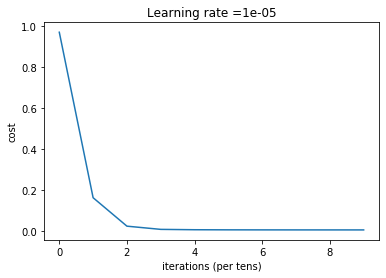

Parameters have been trained!
Train Accuracy: 1.0
Test Accuracy: 1.0


In [58]:
parameters = model(X_train, Y_train, X_test, Y_test, layer_dims, learning_rate = 0.00001,
                   num_epochs = 50, minibatch_size = 32, print_cost = True)

In [59]:
X_train.shape[1]%32

4

In [73]:
def forward_propagation_for_predict(X, parameters, layer_dims):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    L = len(layer_dims)
    
    # Retrieve the parameters from the dictionary "parameters" \
    ZL = X
    
    for l in range(1, L-1):
        ZL = np.add(np.dot(parameters['W' + str(l)], ZL), parameters['b' + str(l)])
        AL = np.max(ZL, 0)   #Relu activation

    ZL = np.add(np.dot(parameters['W' + str(L-1)], ZL), parameters['b' + str(L-1)])
    AL = 1/(1 + np.exp(-ZL))    #Sigmoid activation
    
    return AL

In [74]:
def predict(X, Y, parameters, threshold=0.5):
    AL = forward_propagation_for_predict(X, parameters, layer_dims)[0]
    
    pred = (AL > threshold).astype(int)
    
    tp = np.sum(pred*Y)
    tn = np.sum((1-pred)*(1-Y))
    fp = np.sum(pred*(1-Y))
    fn = np.sum((1-pred)*Y)
    
    print("True positives:", tp)
    print("True negatives:", tn)
    print("False positives:", fp)
    print("False negatives:", fn)
    
    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    F1 = 2*precision*recall/(precision + recall)
    
    print("precision:", precision)
    print("recall:", recall)
    print("F1:", F1)
    

In [75]:
predict(X_train, Y_train, parameters, 0.5)

True positives: 240.0
True negatives: 227419.0
False positives: 32.0
False negatives: 153.0
precision: 0.8823529411764706
recall: 0.6106870229007634
F1: 0.7218045112781953


In [76]:
predict(X_test, Y_test, parameters, 0.5)

True positives: 70.0
True negatives: 56854.0
False positives: 9.0
False negatives: 29.0
precision: 0.8860759493670886
recall: 0.7070707070707071
F1: 0.7865168539325842
